![example](images/director_shot.jpeg)

# Movie Analysis

**Authors:** Joe, Kamryn, Jake
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

This project took a deep dive into the world of movies, analyzing large amounts information from tons of popular websites for movie reviews, like Rotten Tomatoes and TMDB. Our client, Microsoft, is looking to venture into the realm of movie production and our job is to analyze data in a way that helps them make a smart business decision. While cleaning and looking through all the data we had, it became important to define what a good or successful movie is. Using things like budget, revenue, profit, and popularity, we determined what a good movie suggestion would be for three levels of risk.

## Business Problem

Microsoft is opening a movie studio in response to competition's creation of video content. However, they are not well voiced in the realm of movie production so it is our job to analyze our data and create a suggestion for which genre of movie they should make. We used a variety of analyses to determine what the most important factors in movie success are. It is important to take into consideration how much the director is willing to spend and what level of risk they want to take. We wanted to answer the question of, "What attributes make a movie successful?". We went through the data and compared the movies we deemed successful, and compared their attributes to those of the movies that did not do well. By doing that analysis, we were able to come up with a metric that we can use to determine the success of a movie.

## Data Understanding

To compile our analysis, we used data collected from a couple of datasets that were given to us and from some that we found online. We used a TMDB dataset from kaggle.com that had information on over 10,000 movies that were made up to the year 2017. The datasets included characteristics of different movies like runtime, budgets, revenue, and critic & consumer ratings. We deemed these characteristics to be the most important when evaluating the success of a film. Although the datasets included a lot of information on a ton of different movies, some of the datasets were limited in that they had null values and/or placeholders in place for characteristics that were not recorded for older movies.

## Data Preparation

As we started to compile of our data and examine it, we realized that there was a lot more data than we needed to make our analysis. We decided to clean our data and get rid of the columns and rows that contained null values and placeholders and just columns with information that we just did not need. We also created columns that compared data from different columns to get a better sense of the data we were working with. For example, we created a profit column that took the difference between a movie's budget and its revenue. In the movie industry, there are movies in each genre that either did unusually well like Avatar or were unusually bad. These movies were outliers in our data sets that skewed our data so we created a line of code that calculated the z score and got rid of any movies that were 2 or more standard deviations away from the mean. Getting rid of the outliers was important because as a new movie producer, Microsoft does not necessarily need to aim to create record breaking, blockbuster films like Jurassic World and Star Wars in order to be successful.

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import statistics
%matplotlib inline

In [4]:
#loading in data and checking what we're working with
df = pd.read_csv("data/tmdb_movies_data.csv") #data from kaggle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#removing columns that I dont really want right now and checking what's left
df = df.drop(["cast", "homepage", "tagline", "overview", "production_companies", "keywords", "director"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [6]:
#checking the first entries
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [7]:
#checking the last entries
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,95,Documentary,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,74,Horror,11/15/1966,15,1.5,1966,127642.2792,0.0


In [8]:
#we don't want the movies that have 0 for revenue or budget, because they're going to scew our data
#named the dataframe df_temp because its an intermediary dataframe
df_temp = df[df.revenue != 0]
df_temp = df_temp[df_temp.budget != 0]
df_temp = df_temp
df_temp["profit"] = df_temp.revenue - df_temp.budget
df_temp = df_temp.sort_values(by = "profit", )
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 2244 to 1386
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3855 non-null   int64  
 1   imdb_id         3855 non-null   object 
 2   popularity      3855 non-null   float64
 3   budget          3855 non-null   int64  
 4   revenue         3855 non-null   int64  
 5   original_title  3855 non-null   object 
 6   runtime         3855 non-null   int64  
 7   genres          3855 non-null   object 
 8   release_date    3855 non-null   object 
 9   vote_count      3855 non-null   int64  
 10  vote_average    3855 non-null   float64
 11  release_year    3855 non-null   int64  
 12  budget_adj      3855 non-null   float64
 13  revenue_adj     3855 non-null   float64
 14  profit          3855 non-null   int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 481.9+ KB


In [9]:
#seperating out each genre for each movie to evaluate genres by performance (because movies can fit multiple genres)
df_temp["genres"] = df_temp["genres"].str.split("|")
df_temp = df_temp.explode("genres")
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10308 entries, 2244 to 1386
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10308 non-null  int64  
 1   imdb_id         10308 non-null  object 
 2   popularity      10308 non-null  float64
 3   budget          10308 non-null  int64  
 4   revenue         10308 non-null  int64  
 5   original_title  10308 non-null  object 
 6   runtime         10308 non-null  int64  
 7   genres          10308 non-null  object 
 8   release_date    10308 non-null  object 
 9   vote_count      10308 non-null  int64  
 10  vote_average    10308 non-null  float64
 11  release_year    10308 non-null  int64  
 12  budget_adj      10308 non-null  float64
 13  revenue_adj     10308 non-null  float64
 14  profit          10308 non-null  int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 1.3+ MB


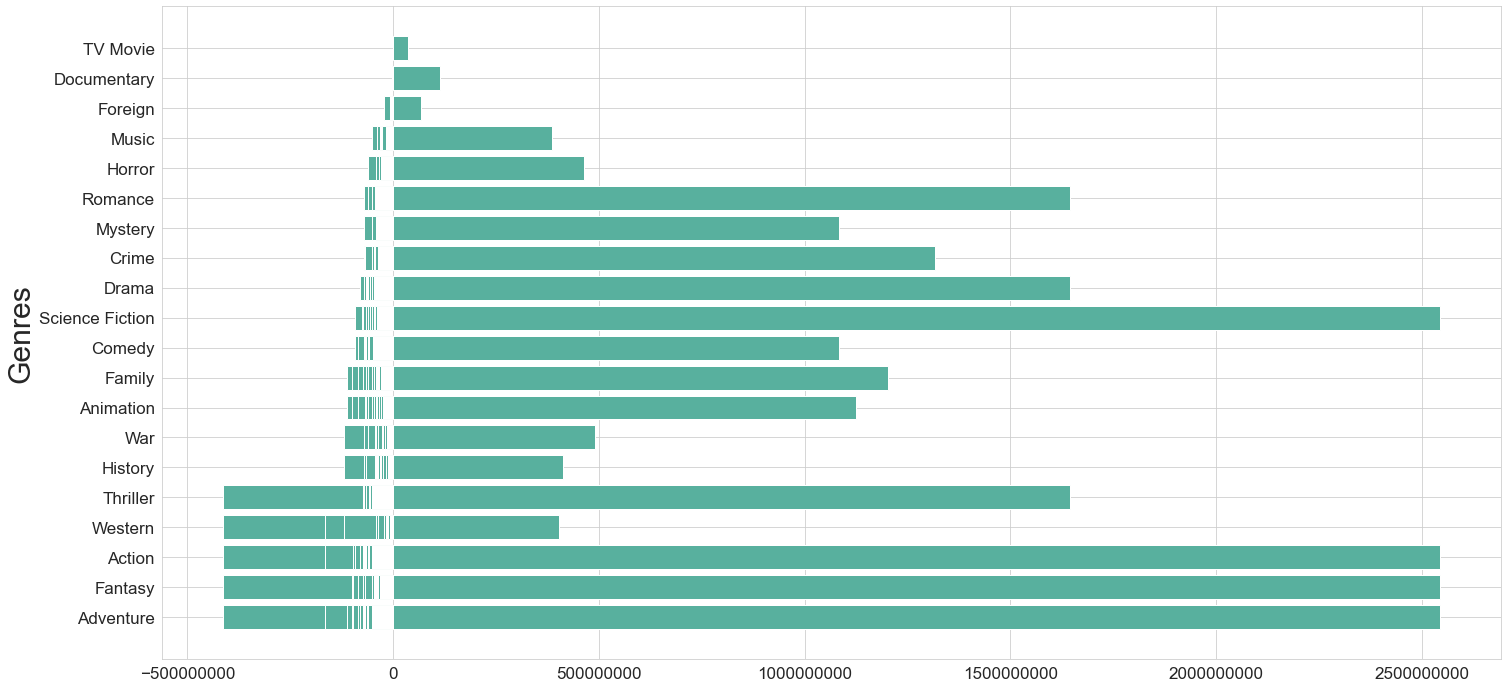

In [10]:
#making some starting graphs to get a better idea for what we're working with
#profit by genre barplot and boxplot below
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(24,12))
plt.ticklabel_format(style="plain")
ax.barh(df_temp["genres"], df_temp["profit"], color="#58b09e")
ax.set_ylabel("Genres", fontsize = 30)
ax.tick_params(labelsize = 17);

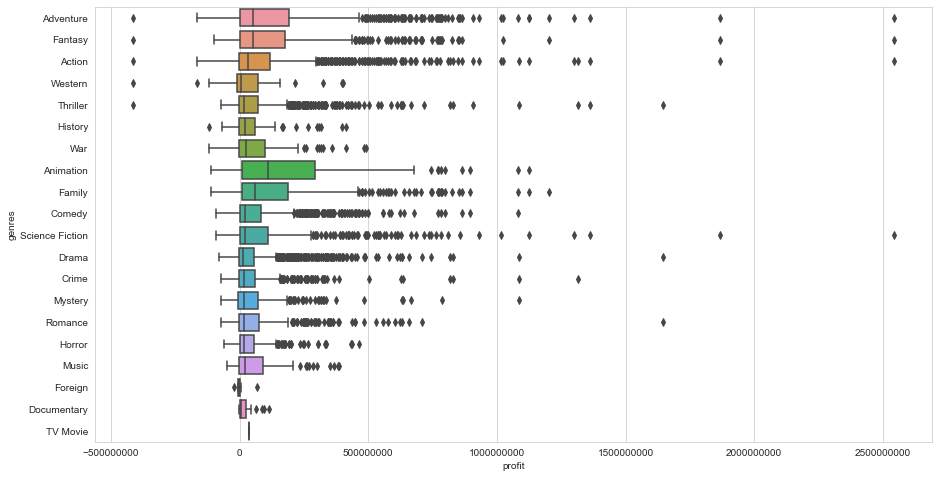

In [9]:
#the boxplot for profit by genre, useful for noticing that there are loads of outliers
fig2, ax2 = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain", useOffset=False)
sns.boxplot(x=df_temp["profit"], y=df_temp["genres"], ax=ax2);

In [10]:
#so im going to address these outliers and then remake the above box-plots
df_temp = df_temp[(np.abs(stats.zscore(df_temp["profit"])) < 2)]

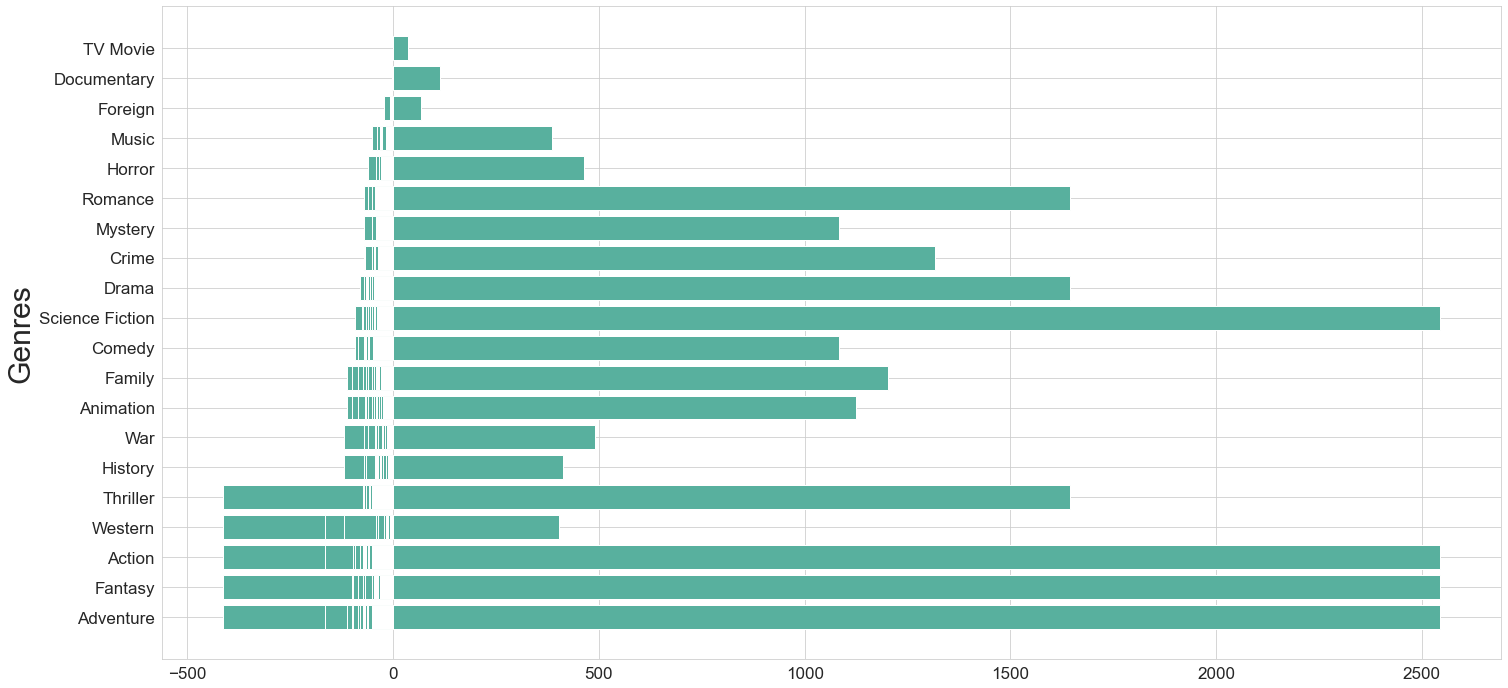

In [20]:
fig, ax = plt.subplots(figsize=(24,12))
plt.ticklabel_format(style="plain")
ax.barh(df_temp["genres"], df_temp["profit"], color="#58b09e")
ax.set_ylabel("Genres", fontsize = 30)
ax.tick_params(labelsize = 17);

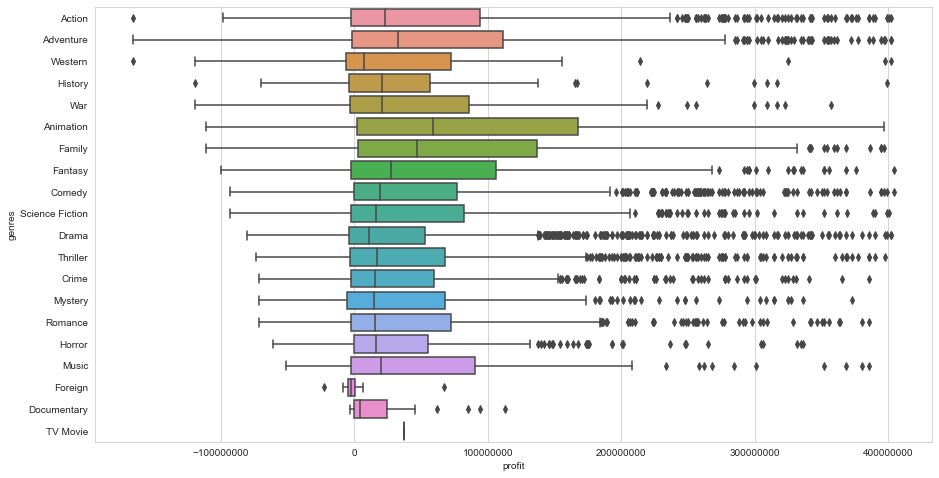

In [12]:
#the boxplot for profit by genre after removing major outliers, looks a lot better
fig3, ax3 = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=df_temp["profit"], y=df_temp["genres"]);

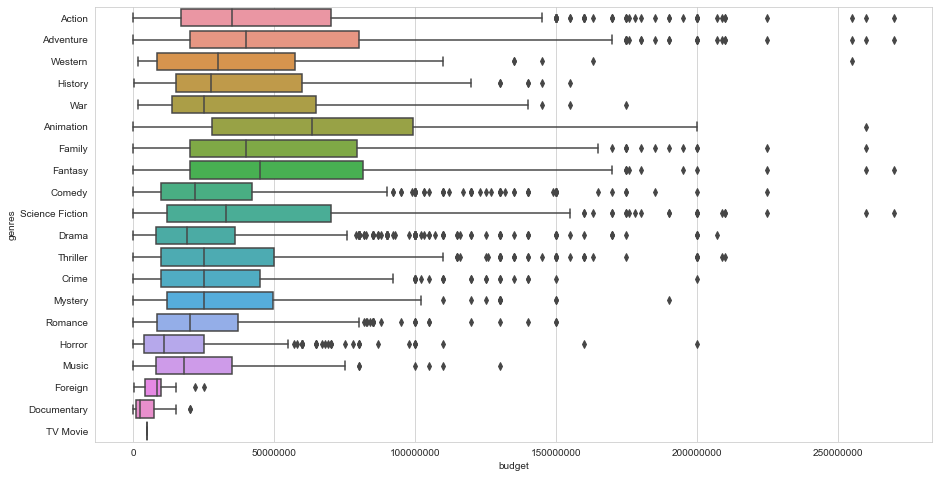

In [13]:
#the boxplot for profit by genre after removing major outliers, looks a lot better
fig4, ax4 = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=df_temp["budget"], y=df_temp["genres"]);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 3484 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  168 non-null    float64
 1   profit  168 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


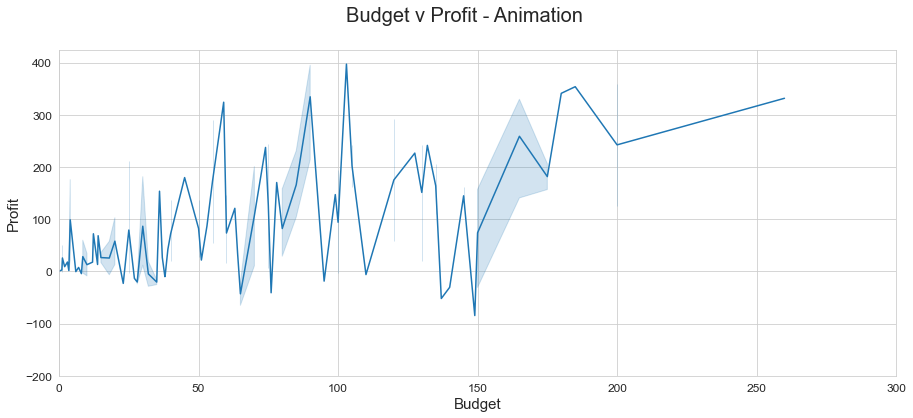

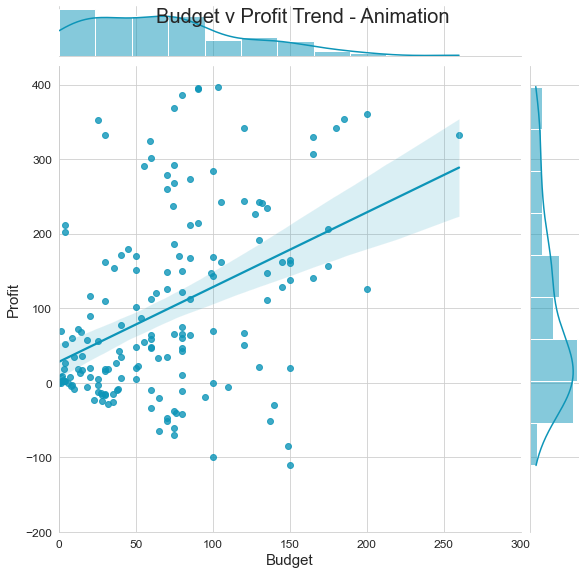

In [14]:
#animation graphs; line graph then linear regression
df_graph = df_temp[df_temp["genres"] == "Animation"]
df_graph_data = df_graph[["budget","profit"]]/1000000

plt.subplots(figsize=(15,6))
sns.lineplot(x=df_graph_data["budget"], y=df_graph_data["profit"])
plt.suptitle("Budget v Profit - Animation", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)
plt.ylim(-200,425)

sns.jointplot(x=df_graph_data["budget"], y=df_graph_data["profit"],
              kind="reg", color="#0d95b8", height=8, ratio=8)
plt.suptitle("Budget v Profit Trend - Animation", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)
plt.ylim(-200,425)

df_graph_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 4078 to 2410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  477 non-null    float64
 1   profit  477 non-null    float64
dtypes: float64(2)
memory usage: 11.2 KB


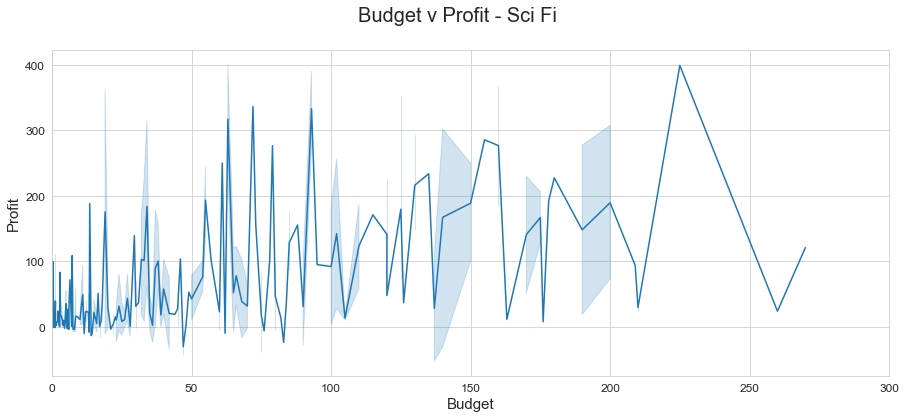

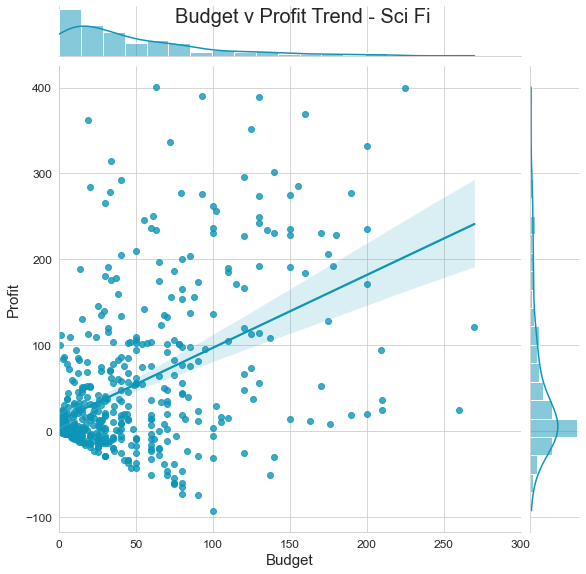

In [15]:
#scifi graphs; line graph then linear regression
df_graph = df_temp[df_temp["genres"] == "Science Fiction"]
df_graph_data = df_graph[["budget","profit"]]/1000000

plt.subplots(figsize=(15,6))
sns.lineplot(x=df_graph_data["budget"], y=df_graph_data["profit"])
plt.suptitle("Budget v Profit - Sci Fi", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)

sns.jointplot(x=df_graph_data["budget"], y=df_graph_data["profit"],
              kind="reg", color="#0d95b8", height=8, ratio=8)
plt.suptitle("Budget v Profit Trend - Sci Fi", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)

df_graph_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 5508 to 8486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  1013 non-null   float64
 1   profit  1013 non-null   float64
dtypes: float64(2)
memory usage: 23.7 KB


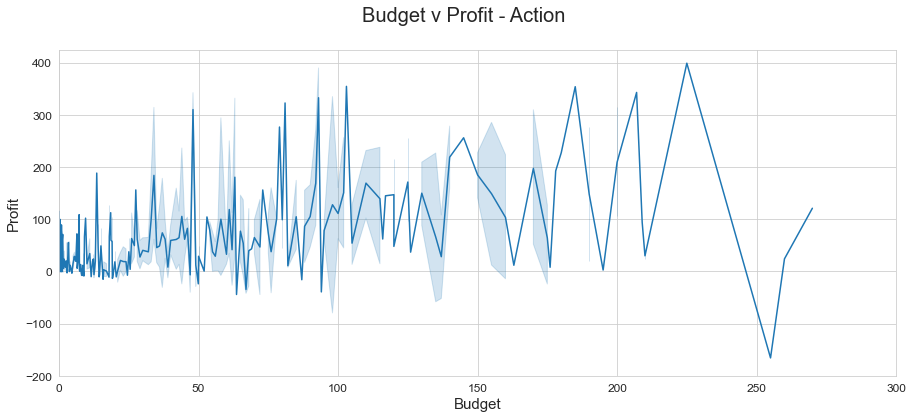

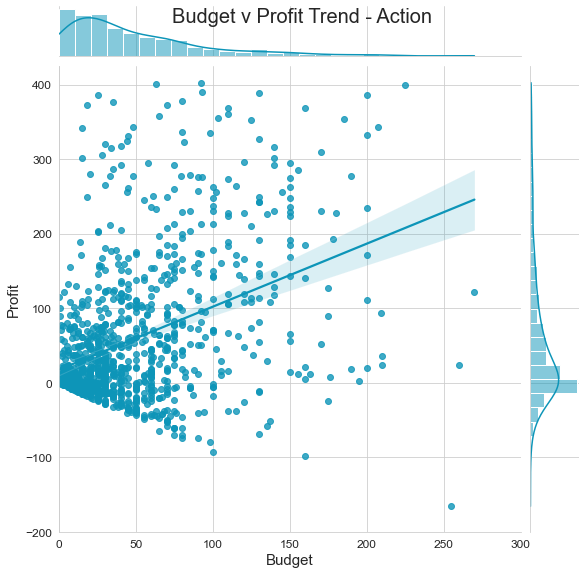

In [16]:
#action graphs; line graph then linear regression
df_graph = df_temp[df_temp["genres"] == "Action"]
df_graph_data = df_graph[["budget","profit"]]/1000000

plt.subplots(figsize=(15,6))
sns.lineplot(x=df_graph_data["budget"], y=df_graph_data["profit"])
plt.suptitle("Budget v Profit - Action", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)
plt.ylim(-200,425)

sns.jointplot(x=df_graph_data["budget"], y=df_graph_data["profit"],
              kind="reg", color="#0d95b8", height=8, ratio=8)
plt.suptitle("Budget v Profit Trend - Action", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)
plt.ylim(-200,425)

df_graph_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 4078 to 4956
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  1326 non-null   float64
 1   profit  1326 non-null   float64
dtypes: float64(2)
memory usage: 31.1 KB


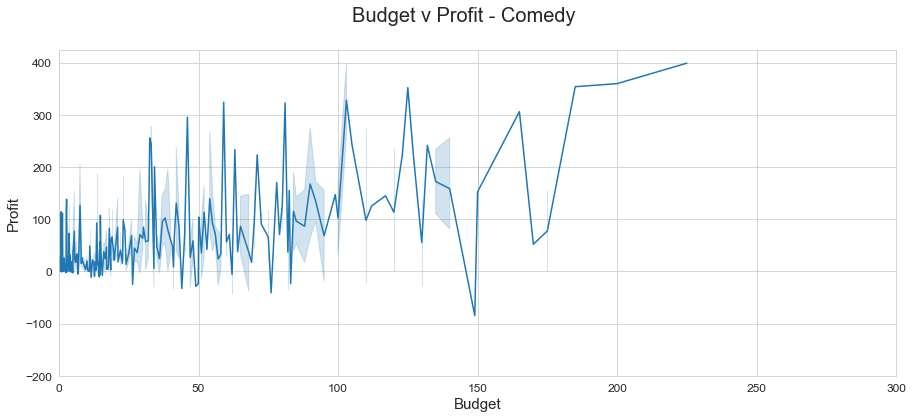

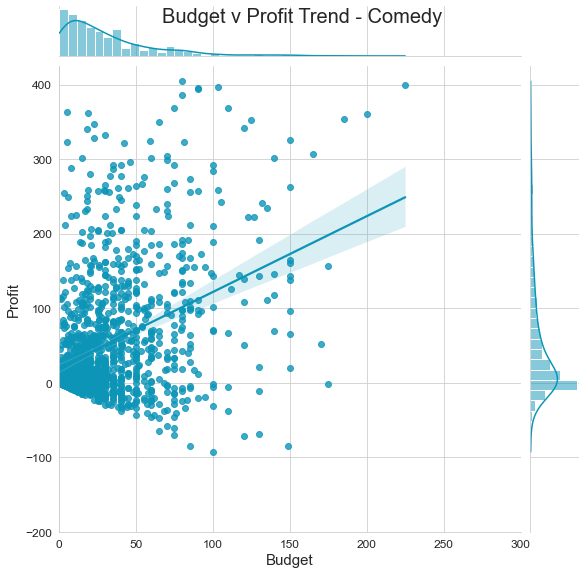

In [17]:
#comedy graphs; line graph then linear regression
df_graph = df_temp[df_temp["genres"] == "Comedy"]
df_graph_data = df_graph[["budget","profit"]]/1000000

plt.subplots(figsize=(15,6))
sns.lineplot(x=df_graph_data["budget"], y=df_graph_data["profit"])
plt.suptitle("Budget v Profit - Comedy", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)
plt.ylim(-200,425)

sns.jointplot(x=df_graph_data["budget"], y=df_graph_data["profit"],
              kind="reg", color="#0d95b8", height=8, ratio=8)
plt.suptitle("Budget v Profit Trend - Comedy", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)
plt.ylim(-200,425)

df_graph_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 2071 to 8271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  654 non-null    float64
 1   profit  654 non-null    float64
dtypes: float64(2)
memory usage: 15.3 KB


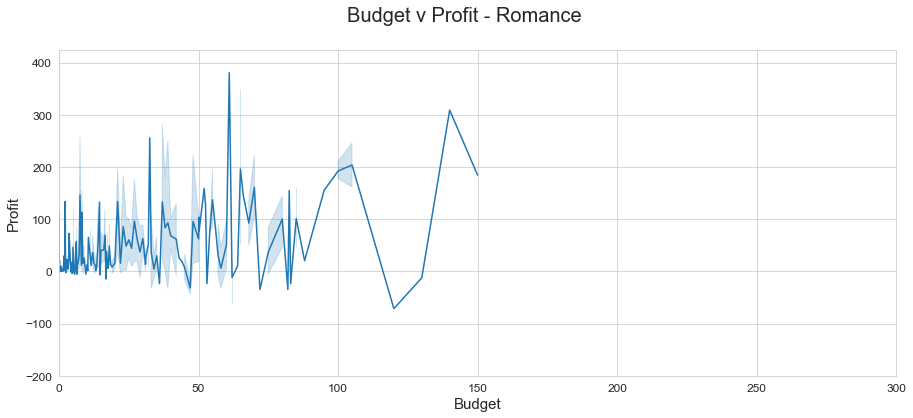

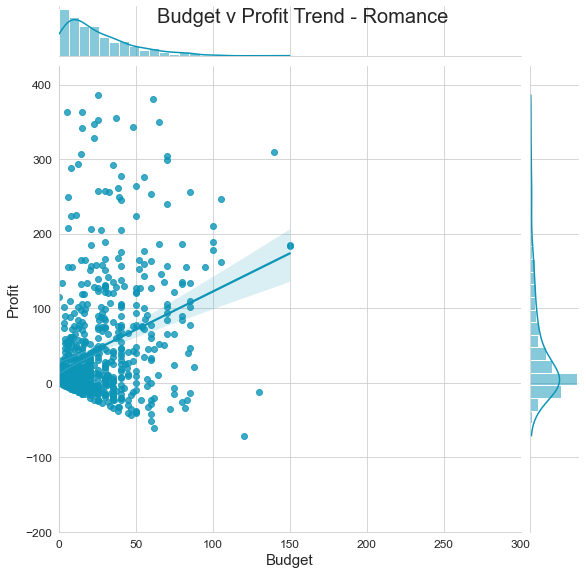

In [18]:
#romance graphs; line graph then linear regression
df_graph = df_temp[df_temp["genres"] == "Romance"]
df_graph_data = df_graph[["budget","profit"]]/1000000

plt.subplots(figsize=(15,6))
sns.lineplot(x=df_graph_data["budget"], y=df_graph_data["profit"])
plt.suptitle("Budget v Profit - Romance", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)
plt.ylim(-200,425)

sns.jointplot(x=df_graph_data["budget"], y=df_graph_data["profit"],
              kind="reg", color="#0d95b8", height=8, ratio=8)
plt.suptitle("Budget v Profit Trend - Romance", fontsize=20)
plt.xlabel("Budget", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.tick_params(labelsize=12)
plt.ticklabel_format(style='plain')
plt.xlim(0,300)
plt.ylim(-200,425)

df_graph_data.info()

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [155]:
#df = pd.read_csv('data/zippedData/tn.movie_budgets.csv')

In [252]:
#tmdsb = pd.read_csv('tmdb.movies.csv.gz')
#tmdsb.head()

In [253]:
#high_popularity= tmdsb.sort_values(by= ['popularity', 'vote_count', 'vote_average'], ascending= False )
#high_popularity.head(30)
#based on this table, which is based on popularity, vote count, and vote average (in that order), it seems that the action
#genre is the most popular

In [17]:
tmdb_movies= pd.read_csv('data/tmdb_movies_data.csv')
tmdb_movies.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation S

In [18]:
tmdb_movies["genres"]= tmdb_movies["genres"].str.split("|")
tmdb_movie = tmdb_movies.explode('genres')
tmdb_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [19]:
cleaned_tmdb= tmdb_movie.sort_values(by= ['vote_count', 'vote_average','popularity', 'revenue'], ascending= False)

In [168]:
cleaned_tmdb.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Thriller,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Science Fiction,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Mystery,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction,Marvel Studios,4/25/2012,8903,7.3,2012,208943741.9,1.443191e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Action,Marvel Studios,4/25/2012,8903,7.3,2012,208943741.9,1.443191e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Adventure,Marvel Studios,4/25/2012,8903,7.3,2012,208943741.9,1.443191e+09
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,240886902.9,2.827124e+09
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Adventure,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,240886902.9,2.827124e+09


In [20]:
cleaned_tmdbs= cleaned_tmdb.drop(['cast', 'homepage', 'tagline', 'overview', 'production_companies', 'keywords'], axis=1)
cleaned_tmdbs.head()
#We got rid of columns that were not needed in order for us to make conclusions on the data

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Action,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Thriller,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Science Fiction,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Mystery,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Adventure,7/14/2010,9767,7.9,2010,160000000.0,825500000.0


In [21]:
cleaned_tmdbs_filtered= cleaned_tmdbs[cleaned_tmdbs['budget'] >= 5]
#filtering through the data to get rid of rows that have null values or zero put in as a placeholder for budget and revenue33

In [22]:
cleaned_tmdbs_filtered

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Action,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Thriller,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Science Fiction,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Mystery,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Adventure,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,19058,tt0247303,0.128169,15000000,163169,Down,Dick Maas,111,Thriller,5/11/2001,10,3.7,2001,1.847232e+07,2.009407e+05
1880,20236,tt1182609,0.077477,6000000,0,Direct Contact,Danny Lerner,90,Action,4/16/2009,10,3.5,2009,6.098403e+06,0.000000e+00
1880,20236,tt1182609,0.077477,6000000,0,Direct Contact,Danny Lerner,90,Adventure,4/16/2009,10,3.5,2009,6.098403e+06,0.000000e+00
1880,20236,tt1182609,0.077477,6000000,0,Direct Contact,Danny Lerner,90,Thriller,4/16/2009,10,3.5,2009,6.098403e+06,0.000000e+00


In [23]:
cleaned_revenue = cleaned_tmdbs[cleaned_tmdbs.revenue != 0]
filtered_tmdbs= cleaned_revenue[cleaned_revenue.budget !=0 ]

In [24]:

filtered_tmdbs
#got rid of all movies that had 0 for either budget or revenue

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Action,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Thriller,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Science Fiction,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Mystery,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Adventure,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,11221,tt0086955,0.174241,18000000,19265302,Best Defense,Willard Huyck,94,Comedy,7/20/1984,10,3.8,1984,3.778276e+07,4.043868e+07
2855,19058,tt0247303,0.128169,15000000,163169,Down,Dick Maas,111,Action,5/11/2001,10,3.7,2001,1.847232e+07,2.009407e+05
2855,19058,tt0247303,0.128169,15000000,163169,Down,Dick Maas,111,Horror,5/11/2001,10,3.7,2001,1.847232e+07,2.009407e+05
2855,19058,tt0247303,0.128169,15000000,163169,Down,Dick Maas,111,Mystery,5/11/2001,10,3.7,2001,1.847232e+07,2.009407e+05


In [25]:
filtered_tmbdbs=filtered_tmdbs[(np.abs(stats.zscore(filtered_tmdbs['vote_count'])) <3)]
filtered_tmbdbs= filtered_tmdbs[(np.abs(stats.zscore(filtered_tmdbs['vote_count']))> -3)]
filtered_tmdbs.head()
#getting rid of major outliers that were skewing the data

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Action,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Thriller,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Science Fiction,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Mystery,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Adventure,7/14/2010,9767,7.9,2010,160000000.0,825500000.0


In [27]:
filtered_tmdbs.set_index('original_title', inplace= True
#Set the index to the title to make it easier to pull values from different columns



SyntaxError: unexpected EOF while parsing (<ipython-input-27-580c49a2813a>, line 3)

In [45]:
#filtered_tmdbs['genres']= filtered_tmdbs['genres'].str.split("|", n= 1, expand = True)
#filtered_tmdbs.head(20)

In [28]:
genre_mean= filtered_tmdbs.groupby(['genres']).mean()
#just trying to find a way to find the genre with the highest vote counts and averages. I think this works we'll see
#ask how to get genres sorted

In [183]:
genre_mean.head(20)
#finally got the genres in one word, so I'm going to make a visualization on the average vote_average for each genre!

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,32862.453959,1.566222,5.641610e+07,1.564339e+08,111.645488,804.016575,6.036004,2000.690608,6.640907e+07,1.952089e+08
Adventure,31810.459279,1.867693,6.993891e+07,2.182919e+08,112.615487,956.293725,6.124433,2000.178905,8.125573e+07,2.714075e+08
Animation,43459.000000,1.710622,7.693647e+07,2.571215e+08,89.228856,888.885572,6.380597,2003.930348,8.347215e+07,2.909574e+08
Comedy,37314.684831,1.012321,3.310906e+07,9.733657e+07,101.650957,396.173785,6.026436,2001.655376,3.917646e+07,1.213085e+08
Crime,33579.398773,1.123152,3.303109e+07,8.401552e+07,111.523006,519.664110,6.298620,2000.682515,3.989487e+07,1.102273e+08
Documentary,28257.028571,0.294458,4.852976e+06,2.252440e+07,101.428571,68.628571,6.660000,2004.742857,5.379702e+06,2.480617e+07
Drama,43316.577689,1.001181,2.805349e+07,7.428551e+07,115.892430,413.547524,6.395959,2001.393853,3.470978e+07,1.013213e+08
Family,33711.256471,1.459043,6.247916e+07,2.031535e+08,98.665882,679.800000,6.127059,2001.682353,7.110099e+07,2.437910e+08
Fantasy,28625.234848,1.754315,7.071740e+07,2.182341e+08,107.608586,898.520202,6.062879,2001.184343,8.023752e+07,2.499928e+08


In [29]:
vote_average = genre_mean['vote_average'].sort_values(ascending= False)
vote_average
#getting my variables together to make a graph

genres
Documentary        6.660000
War                6.586555
History            6.578295
Western            6.467308
Drama              6.395959
Animation          6.380597
Music              6.315441
Crime              6.298620
Mystery            6.194767
Romance            6.189955
Family             6.127059
Adventure          6.124433
Foreign            6.123077
Thriller           6.065892
Fantasy            6.062879
Action             6.036004
Science Fiction    6.027308
Comedy             6.026436
Horror             5.710799
TV Movie           5.600000
Name: vote_average, dtype: float64

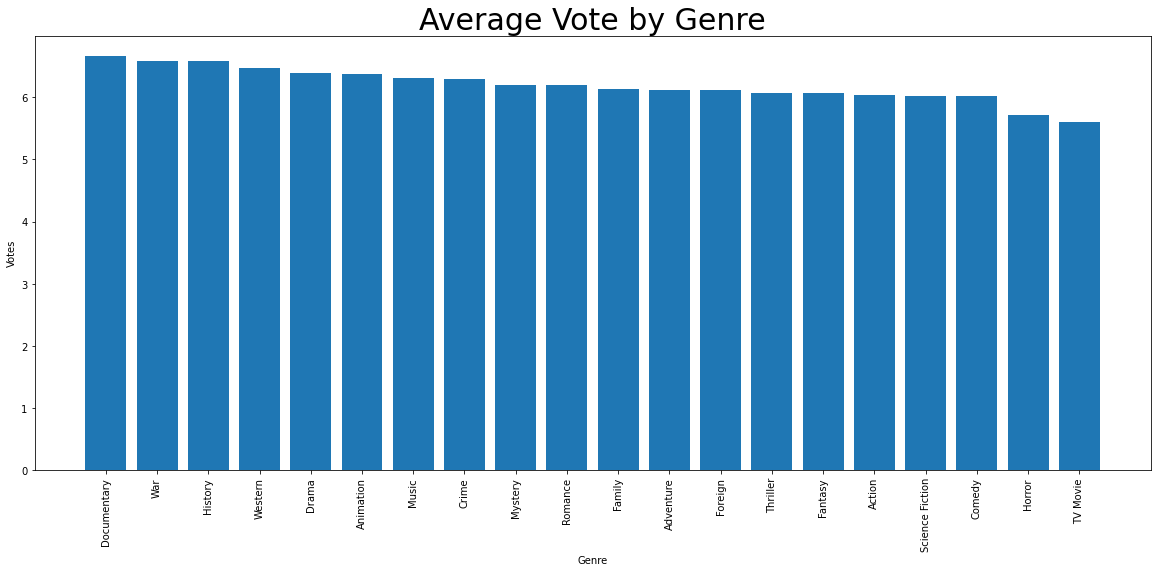

In [32]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(vote_average.index, vote_average)
ax.set_xlabel('Genre')
ax.set_ylabel('Votes')
ax.set_title('Average Vote by Genre', fontsize= 30)
plt.xticks(rotation=90);
#Looking at the graph, there is not much variation within the dataset of average scores. My next visualization will look
#at the vote count which will give me more information on the more popular genres.

In [33]:
vote_count = genre_mean['vote_count'].sort_values(ascending= False)
vote_count

genres
Science Fiction    967.217308
Adventure          956.293725
Fantasy            898.520202
Animation          888.885572
Action             804.016575
Family             679.800000
War                563.394958
Western            548.307692
Thriller           547.220747
Crime              519.664110
Mystery            493.049419
History            415.038760
Drama              413.547524
Comedy             396.173785
Romance            343.956522
Horror             318.762419
Music              281.779412
Documentary         68.628571
TV Movie            35.000000
Foreign             26.538462
Name: vote_count, dtype: float64

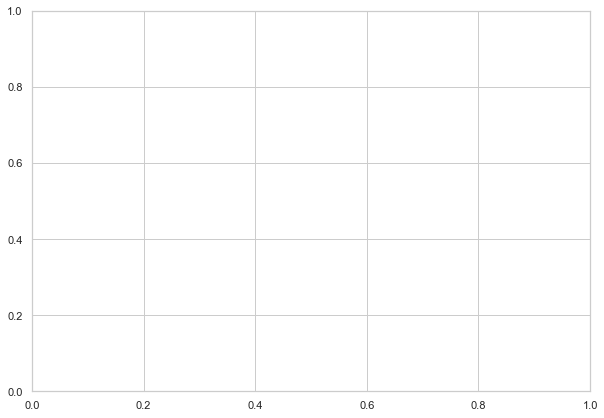

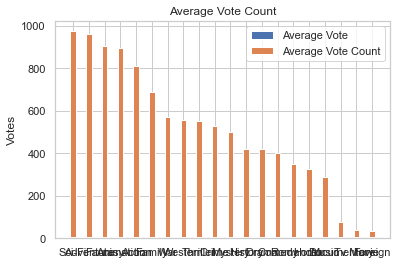

In [236]:
labels= ['Sci-Fi', 'Adventure', 'Fantasy', 'Animation', 'Action', 'Family', 'War', 'Western', 'Thriller', 'Crime', 'Mystery', 'History', 'Drama', 'Comedy', 'Romance', 'Horror', 'Music', 'Documentary', 'Tv Movie', 'Foreign']
avg_vote= [6.66000, 6.586555, 6.578295, 6.467308, 6.395959, 6.380597, 6.315441, 6.298620, 6.194767 ,6.189955, 6.127059, 
           6.124433, 6.123077,6.065892, 6.062879, 6.036004,6.027308, 6.026436,5.710799, 5.600000]
avg_count= [967.217308,956.293725,898.520202,888.885572, 804.016575, 679.800000, 563.394958,548.307692,547.220747, 519.664110,493.049419, 415.038760,413.547524, 396.173785, 343.956522, 318.762419,281.779412, 68.628571, 35.000000, 26.538462 ]
fig = plt.subplots(figsize =(10, 7))
width= 0.35
fig, ax = plt.subplots()
ax.bar(labels,avg_vote, width, label='Average Vote')
ax.bar(labels, avg_count, width, bottom=avg_vote, label='Average Vote Count')
 
ax.set_ylabel('Votes')
ax.set_title('Average Vote Count')
ax.legend()
 
plt.show()

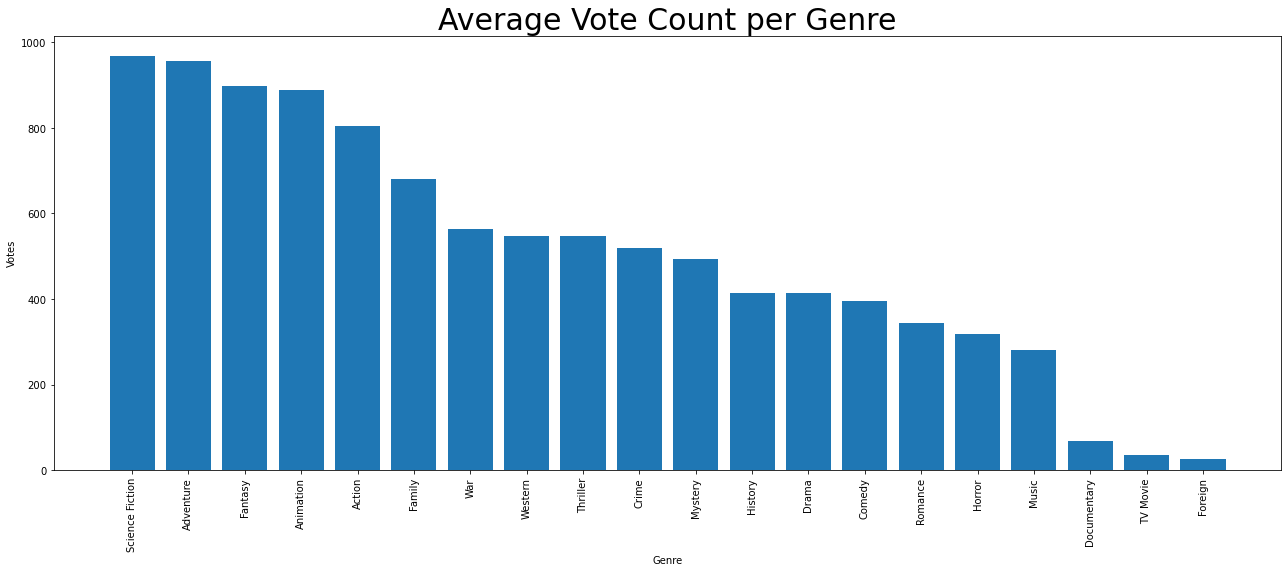

In [35]:
fig, ax = plt.subplots(figsize=(22,8))
ax.bar(vote_count.index, vote_count)
ax.set_xlabel('Genre')
ax.set_ylabel('Votes')
ax.set_title('Average Vote Count per Genre', fontsize= 30)
plt.xticks(rotation=90);
#The vote count has alot more variation than the voting score data. You can look at vote count as a type of popularity 
#measure. The more votes it has, the more views it had.

<ipython-input-241-9c6b98c2dd58>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


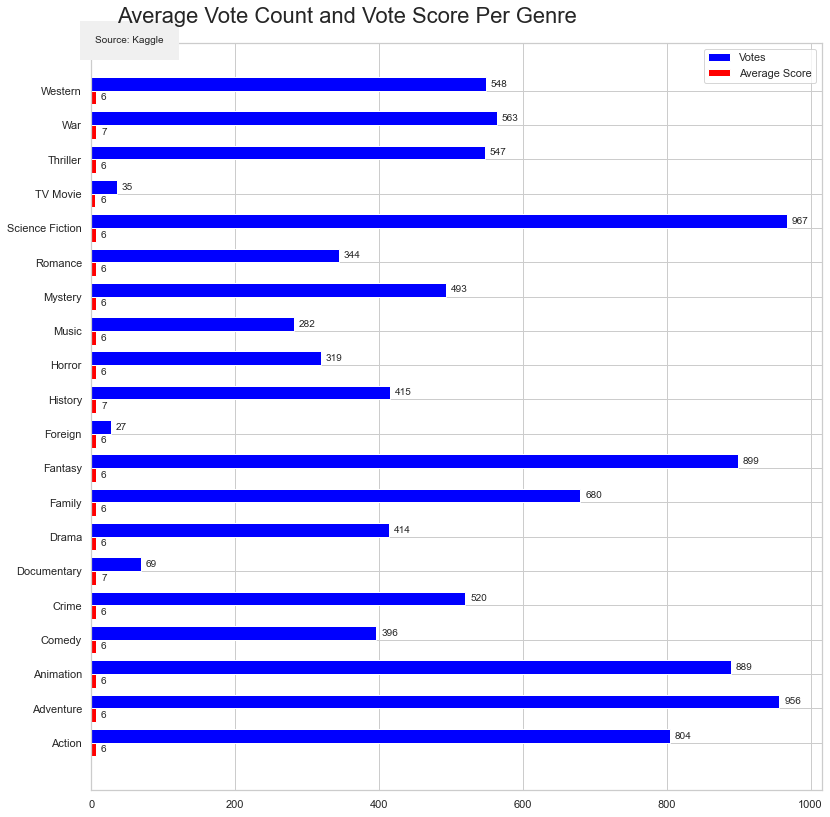

In [241]:
first_bar = genre_mean['vote_count']
first_bar_label = 'Votes'
first_bar_color = 'blue'
second_bar = genre_mean['vote_average']
second_bar_label = 'Average Score'
second_bar_color = 'red'
labels = genre_mean.index
width = 0.4  # the width of the bars
plot_title = 'Average Vote Count and Vote Score Per Genre'
title_size = 22
subtitle = 'Source: Kaggle'
fig, ax = plt.subplots(figsize=(16,12))
plt.tight_layout() #make the bars neater
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)
# Format ticks
#ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])
# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)
# Set subtitle
tform = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#F0F0F0', ec='none'))
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords='offset points',
        va='center',
        ha=ha)
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()
# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0));

<AxesSubplot:xlabel='vote_count', ylabel='vote_average'>

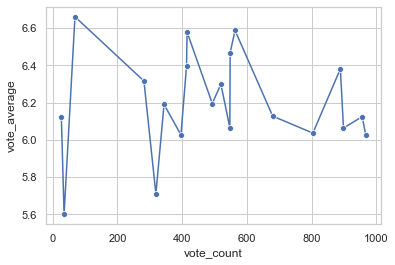

In [251]:
sns.lineplot(data= genre_mean, x= 'vote_count' , y='vote_average', marker= 'o')

#This graph shows the relationship between vote count and vote average and shows how having a higher vote count does not 
#necessarily mean that you will have a higher score 

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from scipy import stats

In [4]:
df_rotten_tomatoes_critic = pd.read_csv("data/zippedData/rotten_tomatoes_critic_reviews.csv.gz")

In [1]:
df_rotten_tomatoes_critic.head()

NameError: name 'df_rotten_tomatoes_critic' is not defined

In [4]:
df_rotten_tomatoes_critic.dropna()
#dropping null values

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...,...,...,...,...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [5]:
df_rotten_tomatoes_movies = pd.read_csv("data/zippedData/rotten_tomatoes_movies.csv.gz")
df_rotten_tomatoes_movies.head(1)
#importing and first row

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [6]:
df_rotten_tomatoes_movies_clean = df_rotten_tomatoes_movies.drop(['tomatometer_count','critics_consensus', 'rotten_tomatoes_link', 'movie_info', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company'], axis=1).dropna()
df_rotten_clean = df_rotten_tomatoes_movies_clean.sort_values(by=['audience_count','tomatometer_rating','audience_rating'], ascending = False).head()
df_rotten_clean
#took the df and dropped extra colmns and then sorted them by audience tomato meter and audience

,movie_title,content_rating,genres,runtime,tomatometer_status,tomatometer_rating,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
16297,Titanic,PG-13,"Drama, Romance",195.0,Certified-Fresh,89.0,Upright,69.0,35797635.0,62,171,21
15410,The Lord of the Rings: The Return of the King,PG-13,"Action & Adventure, Classics, Science Fiction ...",200.0,Certified-Fresh,93.0,Upright,86.0,34679773.0,53,257,18
13694,Spider-Man,PG-13,"Action & Adventure, Mystery & Suspense, Scienc...",116.0,Certified-Fresh,90.0,Upright,67.0,34297354.0,47,220,25
13276,Shrek 2,PG,"Animation, Comedy, Kids & Family, Science Fict...",92.0,Certified-Fresh,89.0,Upright,69.0,34232524.0,53,209,27
7526,Harry Potter and the Goblet of Fire,PG-13,"Action & Adventure, Kids & Family, Science Fic...",157.0,Certified-Fresh,88.0,Upright,74.0,34153607.0,53,224,31


In [7]:
df_tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz")

In [8]:
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
df_tmdb_data = pd.read_csv("data/zippedData/tmdb_movies_data.csv")
df_tmdb_data
#importing data frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [12]:
df_tmdb_clean = df_tmdb_data.drop(['cast','homepage','tagline','overview','production_companies', 'keywords'], axis=1 )
df_tmdb_clean
#dropped tons of useless coluumns

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [13]:
df_temp = df_tmdb_clean[df_tmdb_clean['revenue'] !=0]

In [14]:
df_temp = df_temp[df_temp['budget']!=0]
df_temp
#cleaned data with no 0s in revenue and budget

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,6/21/1966,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,7/13/1966,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,Howard Hawks,120,Action|Western,12/17/1966,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,12/20/1966,28,7.0,1966,8.061618e+07,1.343603e+08


In [15]:
df_temp['genres'] = df_temp['genres'].str.split("|")
df_temp = df_temp.explode('genres')
df_temp.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [16]:
df_averages = df_temp.groupby(['genres']).mean()
df_averages

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,32862.453959,1.566222,5.641610e+07,1.564339e+08,111.645488,804.016575,6.036004,2000.690608,6.640907e+07,1.952089e+08
Adventure,31810.459279,1.867693,6.993891e+07,2.182919e+08,112.615487,956.293725,6.124433,2000.178905,8.125573e+07,2.714075e+08
Animation,43459.000000,1.710622,7.693647e+07,2.571215e+08,89.228856,888.885572,6.380597,2003.930348,8.347215e+07,2.909574e+08
Comedy,37314.684831,1.012321,3.310906e+07,9.733657e+07,101.650957,396.173785,6.026436,2001.655376,3.917646e+07,1.213085e+08
Crime,33579.398773,1.123152,3.303109e+07,8.401552e+07,111.523006,519.664110,6.298620,2000.682515,3.989487e+07,1.102273e+08
Documentary,28257.028571,0.294458,4.852976e+06,2.252440e+07,101.428571,68.628571,6.660000,2004.742857,5.379702e+06,2.480617e+07
Drama,43316.577689,1.001181,2.805349e+07,7.428551e+07,115.892430,413.547524,6.395959,2001.393853,3.470978e+07,1.013213e+08
Family,33711.256471,1.459043,6.247916e+07,2.031535e+08,98.665882,679.800000,6.127059,2001.682353,7.110099e+07,2.437910e+08
Fantasy,28625.234848,1.754315,7.071740e+07,2.182341e+08,107.608586,898.520202,6.062879,2001.184343,8.023752e+07,2.499928e+08


Text(0.5, 1.0, 'Average Budget per Genre')

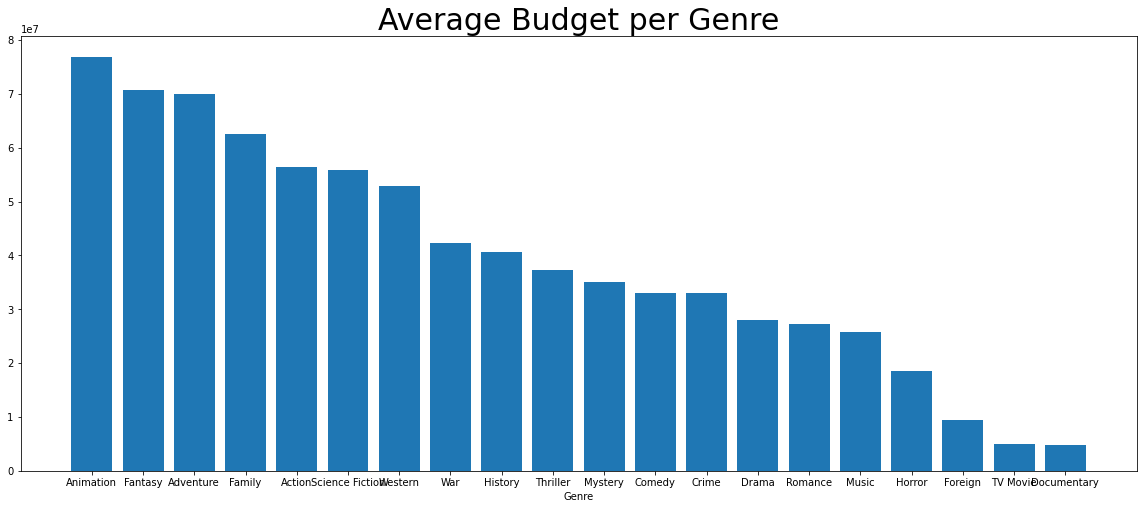

In [17]:
budget_averages = df_averages['budget'].sort_values(ascending = False)
budget_averages

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(budget_averages.index, budget_averages)
ax.set_xlabel('Genre')
ax.set_title('Average Budget per Genre', fontsize=30)


Text(0.5, 1.0, 'Average Revenue per Genre')

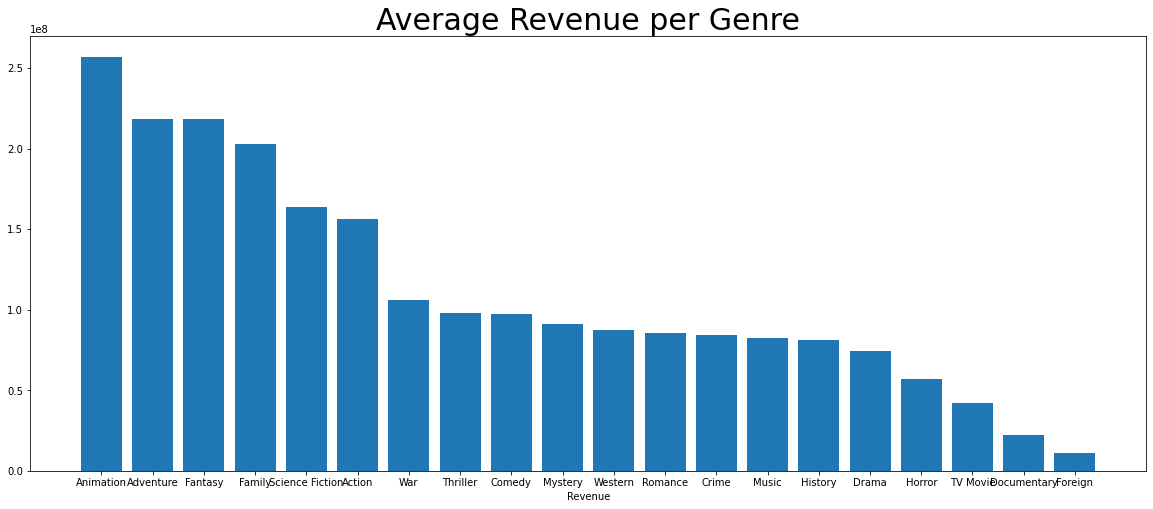

In [18]:
revenue_averages = df_averages['revenue'].sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(revenue_averages.index, revenue_averages)
ax.set_xlabel('Revenue')
ax.set_title('Average Revenue per Genre', fontsize=30)

In [19]:
df_averages

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,32862.453959,1.566222,5.641610e+07,1.564339e+08,111.645488,804.016575,6.036004,2000.690608,6.640907e+07,1.952089e+08
Adventure,31810.459279,1.867693,6.993891e+07,2.182919e+08,112.615487,956.293725,6.124433,2000.178905,8.125573e+07,2.714075e+08
Animation,43459.000000,1.710622,7.693647e+07,2.571215e+08,89.228856,888.885572,6.380597,2003.930348,8.347215e+07,2.909574e+08
Comedy,37314.684831,1.012321,3.310906e+07,9.733657e+07,101.650957,396.173785,6.026436,2001.655376,3.917646e+07,1.213085e+08
Crime,33579.398773,1.123152,3.303109e+07,8.401552e+07,111.523006,519.664110,6.298620,2000.682515,3.989487e+07,1.102273e+08
Documentary,28257.028571,0.294458,4.852976e+06,2.252440e+07,101.428571,68.628571,6.660000,2004.742857,5.379702e+06,2.480617e+07
Drama,43316.577689,1.001181,2.805349e+07,7.428551e+07,115.892430,413.547524,6.395959,2001.393853,3.470978e+07,1.013213e+08
Family,33711.256471,1.459043,6.247916e+07,2.031535e+08,98.665882,679.800000,6.127059,2001.682353,7.110099e+07,2.437910e+08
Fantasy,28625.234848,1.754315,7.071740e+07,2.182341e+08,107.608586,898.520202,6.062879,2001.184343,8.023752e+07,2.499928e+08


In [20]:
df_budget_rev = (df_averages[["budget","revenue"]]/1000000).sort_values(['revenue'], ascending = True)
df_budget_rev

,budget,revenue
genres,,
Foreign,9.430669,11.115958
Documentary,4.852976,22.524400
TV Movie,5.000000,42.000000
Horror,18.566308,57.287804
Drama,28.053492,74.285513
History,40.705216,81.405236
Music,25.782059,82.667588
Crime,33.031085,84.015522
Romance,27.275335,85.748008


In [21]:
df_temp = df_temp[(np.abs(stats.zscore(df_temp['budget'])) < 3)]
df_temp = df_temp[(np.abs(stats.zscore(df_temp['budget'])) > -3)]
df_temp.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [22]:
df_averages_nsd = df_temp.groupby(['genres']).mean()
df_budget_rev_nsd = (df_averages_nsd[["budget","revenue"]]/1000000).sort_values(['revenue'], ascending = True)
df_budget_rev_nsd

,budget,revenue
genres,,
Foreign,9.430669,11.115958
Documentary,4.852976,22.524400
TV Movie,5.000000,42.000000
Horror,18.173595,56.260580
Drama,27.341706,71.321827
Crime,31.632562,76.850297
History,40.705216,81.405236
Romance,26.785937,82.090943
Music,25.782059,82.667588


In [23]:
differnce_between = df_budget_rev_nsd['revenue']-df_budget_rev_nsd['budget']
differnce_between.sort_values(ascending=False)

genres
Animation          171.640633
Family             129.570121
Adventure          122.200818
Fantasy            115.372863
Science Fiction     86.922296
Action              80.997536
War                 63.776230
Comedy              62.957845
Music               56.885528
Mystery             56.089761
Thriller            55.689048
Romance             55.305005
Western             47.553608
Crime               45.217736
Drama               43.980121
History             40.700021
Horror              38.086986
TV Movie            37.000000
Documentary         17.671424
Foreign              1.685289
dtype: float64

<ipython-input-24-a7f7012e67ca>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


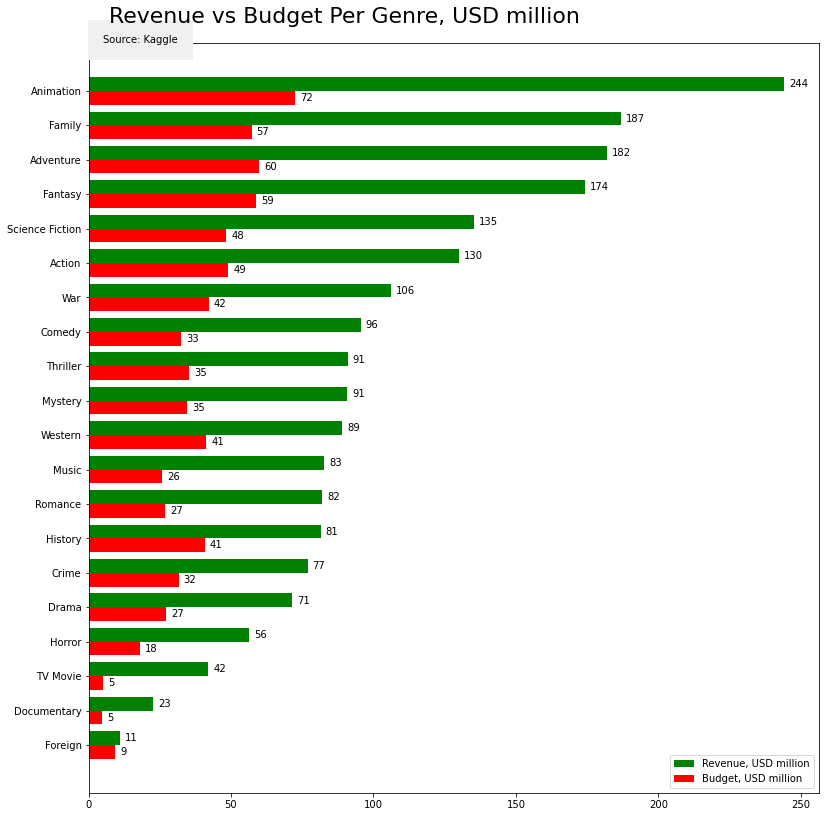

In [24]:
first_bar = df_budget_rev_nsd['revenue']
first_bar_label = 'Revenue, USD million'
first_bar_color = 'green'
second_bar = df_budget_rev_nsd['budget']
second_bar_label = 'Budget, USD million'
second_bar_color = 'red'
labels = df_budget_rev_nsd.index
width = 0.4  # the width of the bars
plot_title = 'Revenue vs Budget Per Genre, USD million'
title_size = 22
subtitle = 'Source: Kaggle'   
df_budget_rev_nsd.sort_values(by='revenue', inplace=True, ascending=True) 
fig, ax = plt.subplots(figsize=(16,12))
plt.tight_layout() #make the bars neater
            
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
            
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))
            
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)
            
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0));
    

In [25]:
df_temp.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [26]:
#creating pop and runtime column to get average of runtime
top_20_pop = df_temp[['popularity','runtime']]
top_20_pop = top_20_pop.sort_values(by="popularity", ascending=False).head(20)
top_20_pop

,popularity,runtime
0,32.985763,124
0,32.985763,124
0,32.985763,124
0,32.985763,124
1,28.419936,120
1,28.419936,120
1,28.419936,120
1,28.419936,120
629,24.949134,169
629,24.949134,169


In [27]:
top_20_rt = top_20_pop['runtime']
top_20_rt

0      124
0      124
0      124
0      124
1      120
1      120
1      120
1      120
629    169
629    169
629    169
630    121
630    121
630    121
2      119
2      119
2      119
631    136
631    136
631    136
Name: runtime, dtype: int64

(70.0, 150.0)

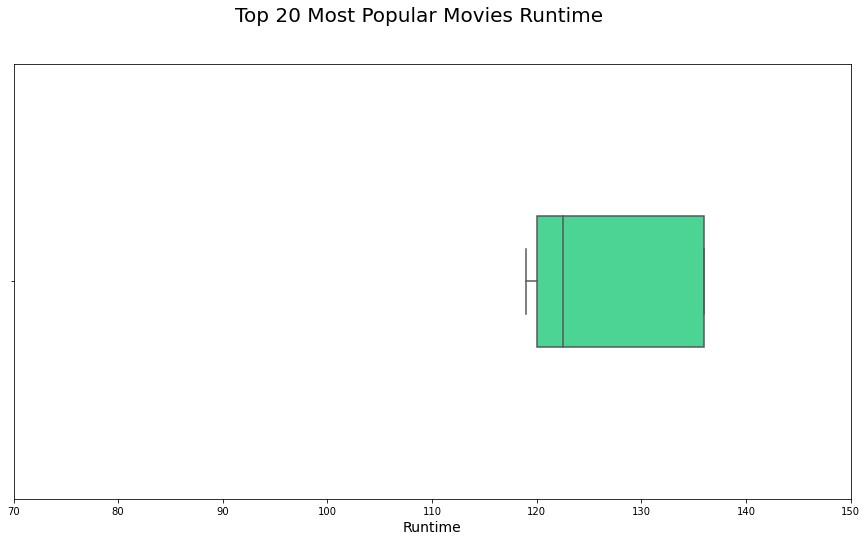

In [43]:
#boxplot = sns.boxplot( x=top_20_pop["runtime"], width = .3,);
#boxplot.axes.set_title("Top 20 Most Popular Movies Runtime", fontsize=16)
#boxplot.set_xlabel("Runtime", fontsize=14)

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_pop["runtime"], width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

In [42]:
#average run time
top_20_pop['runtime'].mean(axis=0).round(2)
#turn into boxplot?

130.55

In [30]:
df_budget_rev_nsd

,budget,revenue
genres,,
Foreign,9.430669,11.115958
Documentary,4.852976,22.524400
TV Movie,5.000000,42.000000
Horror,18.173595,56.260580
Drama,27.341706,71.321827
Crime,31.632562,76.850297
History,40.705216,81.405236
Romance,26.785937,82.090943
Music,25.782059,82.667588


In [31]:
df_comedy = df_temp[df_temp['genres']== 'Comedy']
df_comedy.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Comedy,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy,6/9/2015,3935,8.0,2015,1.609999e+08,7.854116e+08
13,257344,tt2120120,5.984995,88000000,243637091,Pixels,Chris Columbus,105,Comedy,7/16/2015,1575,5.8,2015,8.095996e+07,2.241460e+08
24,318846,tt1596363,4.648046,28000000,133346506,The Big Short,Adam McKay,130,Comedy,12/11/2015,1545,7.3,2015,2.575999e+07,1.226787e+08
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Seth MacFarlane,115,Comedy,6/25/2015,1666,6.3,2015,6.255997e+07,1.985944e+08


In [32]:
top_20_pop_comedy = df_comedy[['popularity','runtime']]
top_20_pop_comedy = top_20_pop_comedy.sort_values(by="popularity", ascending=False).head(20)
top_20_pop_comedy

,popularity,runtime
635,8.691294,102
8,7.404165,91
638,6.907148,119
4179,6.715966,142
9,6.326804,94
641,6.286692,97
6081,6.095293,116
13,5.984995,105
645,5.787396,101
646,5.701683,97


In [33]:
top_20_comedy = top_20_pop_comedy['runtime']
top_20_comedy

635     102
8        91
638     119
4179    142
9        94
641      97
6081    116
13      105
645     101
646      97
649      99
1390     96
5428    180
24      130
26      115
27      130
3913     81
8068     81
8969    103
653     108
Name: runtime, dtype: int64

(70.0, 150.0)

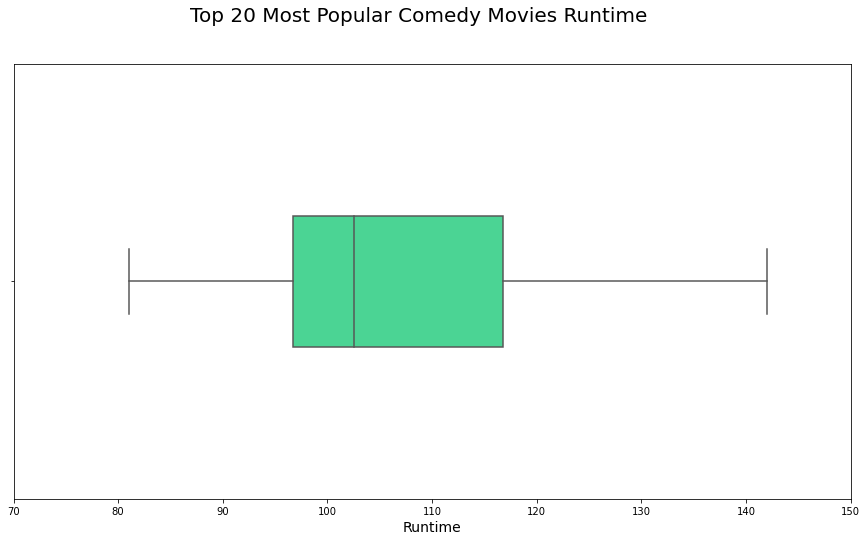

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_comedy, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Comedy Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

(70.0, 150.0)

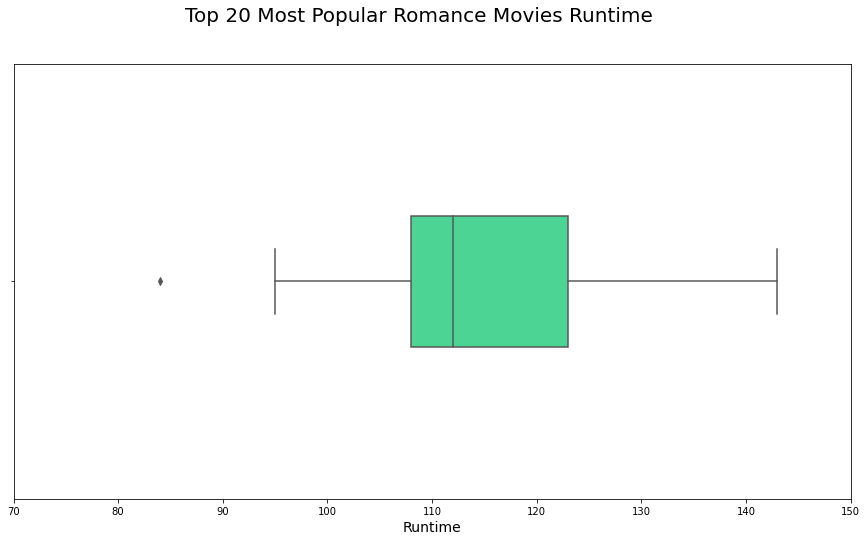

In [35]:
df_romance = df_temp[df_temp['genres']== 'Romance']

top_20_pop_romance = df_romance[['popularity','runtime']]
top_20_pop_romance = top_20_pop_romance.sort_values(by="popularity", ascending=False).head(20)

top_20_romance = top_20_pop_romance['runtime']
top_20_romance

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_romance, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Romance Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

(70.0, 150.0)

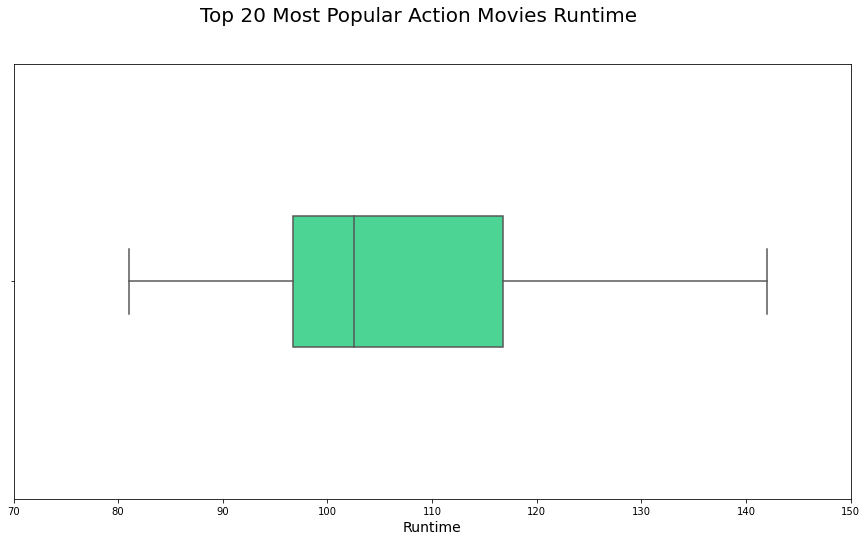

In [36]:
df_action = df_temp[df_temp['genres']== 'Action']

top_20_pop_action = df_action[['popularity','runtime']]
top_20_pop_action = top_20_pop_action.sort_values(by="popularity", ascending=False).head(20)

top_20_action = top_20_pop_action['runtime']
top_20_action

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_comedy, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Action Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

(70.0, 150.0)

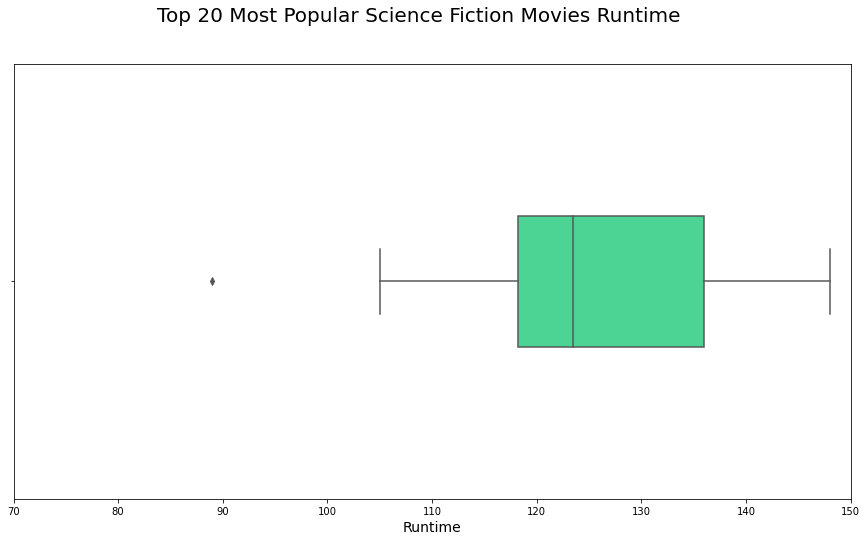

In [37]:
df_scifi = df_temp[df_temp['genres']== 'Science Fiction']

top_20_pop_scifi = df_scifi[['popularity','runtime']]
top_20_pop_scifi = top_20_pop_scifi.sort_values(by="popularity", ascending=False).head(20)

top_20_scifi = top_20_pop_scifi['runtime']
top_20_scifi

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_scifi, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Science Fiction Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

(70.0, 150.0)

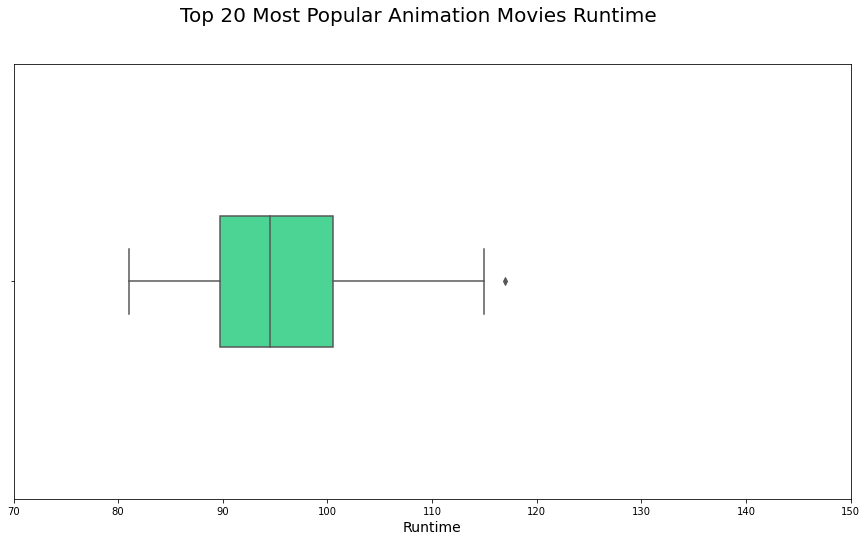

In [38]:
df_animation = df_temp[df_temp['genres']== 'Animation']

top_20_pop_animation = df_animation[['popularity','runtime']]
top_20_pop_animation = top_20_pop_animation.sort_values(by="popularity", ascending=False).head(20)

top_20_animation = top_20_pop_animation['runtime']
top_20_animation

fig, ax = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style="plain")
sns.boxplot(x=top_20_animation, width = .3, color = '#34eb95');
plt.suptitle("Top 20 Most Popular Animation Movies Runtime", fontsize=20)
plt.xlabel("Runtime", fontsize=14)
plt.xlim(70,150)

In [39]:
top_20_pop_animation = df_animation[['popularity','runtime']]
top_20_pop_animation = top_20_pop_animation.sort_values(by="popularity", ascending=False).head(20)
top_20_pop_animation

,popularity,runtime
635,8.691294,102
8,7.404165,91
9,6.326804,94
5422,6.112766,102
1390,4.908902,96
4180,4.782688,89
3913,4.467513,81
8068,4.282462,81
9179,4.143585,83
8243,3.966538,90
